In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('Fish.csv')
print('First 5 rows:\n', data.head())
print('\nThe size of the dataset:', data.shape)
print('\nData types for each col:', data.dtypes)

First 5 rows:
   Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

The size of the dataset: (159, 7)

Data types for each col: Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


In [3]:
# The list of unique species 
unique_species = data['Species'].unique()
print("Unique Species:", unique_species)

# How many species are in our dataset
number_of_species = data['Species'].nunique()
print(f"\nThe number of unique species: {number_of_species}")

# The total number of fish for each species
species_distribution = data['Species'].value_counts()
print('\nThe number of fish for each species:')
print(species_distribution)

Unique Species: ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']

The number of unique species: 7

The number of fish for each species:
Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64


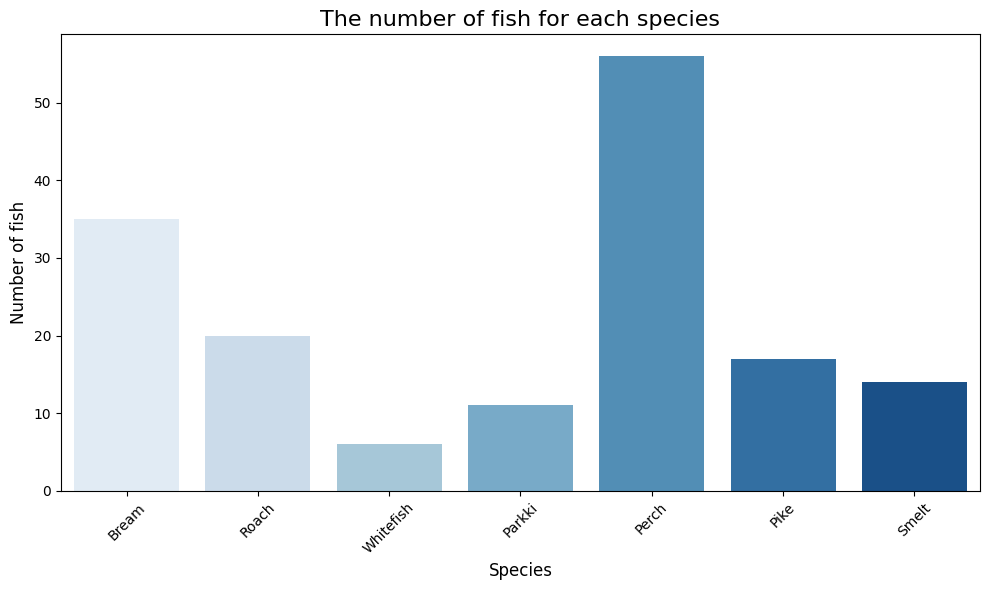

In [4]:
# Show the graphic for each species with their nums of fist
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Species', data = data, hue = 'Species', palette = 'Blues')
plt.title('The number of fish for each species', fontsize = 16)
plt.xlabel('Species', fontsize = 12)
plt.ylabel('Number of fish', fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [5]:
# Now let's find if our dataset is asymmetry or symmetry
# If asymmetry is near 0, the distribution is symmetric
# asymmetry > 1, the distribution is asymmetric to right
# asymmetry < -1, the distribution is asymmetric to left

# First, we use the pandas to find asym.

asimetrie = data['Width'].skew()
print(f"The asymmetry for 'Width': {asimetrie}")

The asymmetry for 'Width': 0.00497224623809981


In [6]:
# Find asym. with scipy.stats skew

asimetrie = skew(data['Width'])
print(f"The asymmetry for 'Width': {asimetrie}")

The asymmetry for 'Width': 0.004925214786309931


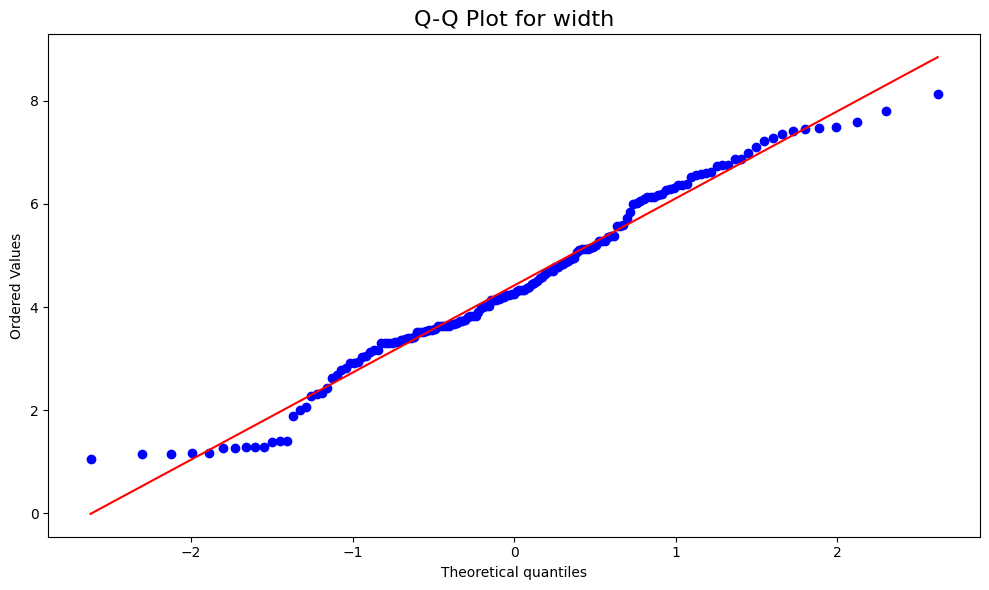

In [7]:
# Graph for checking asymmetry

# If Q-Q plot has the points close to the straight line, 
# then the distribution is nearly normal and has no significant skewness.
plt.figure(figsize = (10, 6))
stats.probplot(data['Width'], dist = "norm", plot = plt)
plt.title('Q-Q Plot for width', fontsize = 16)
plt.tight_layout()
plt.show()

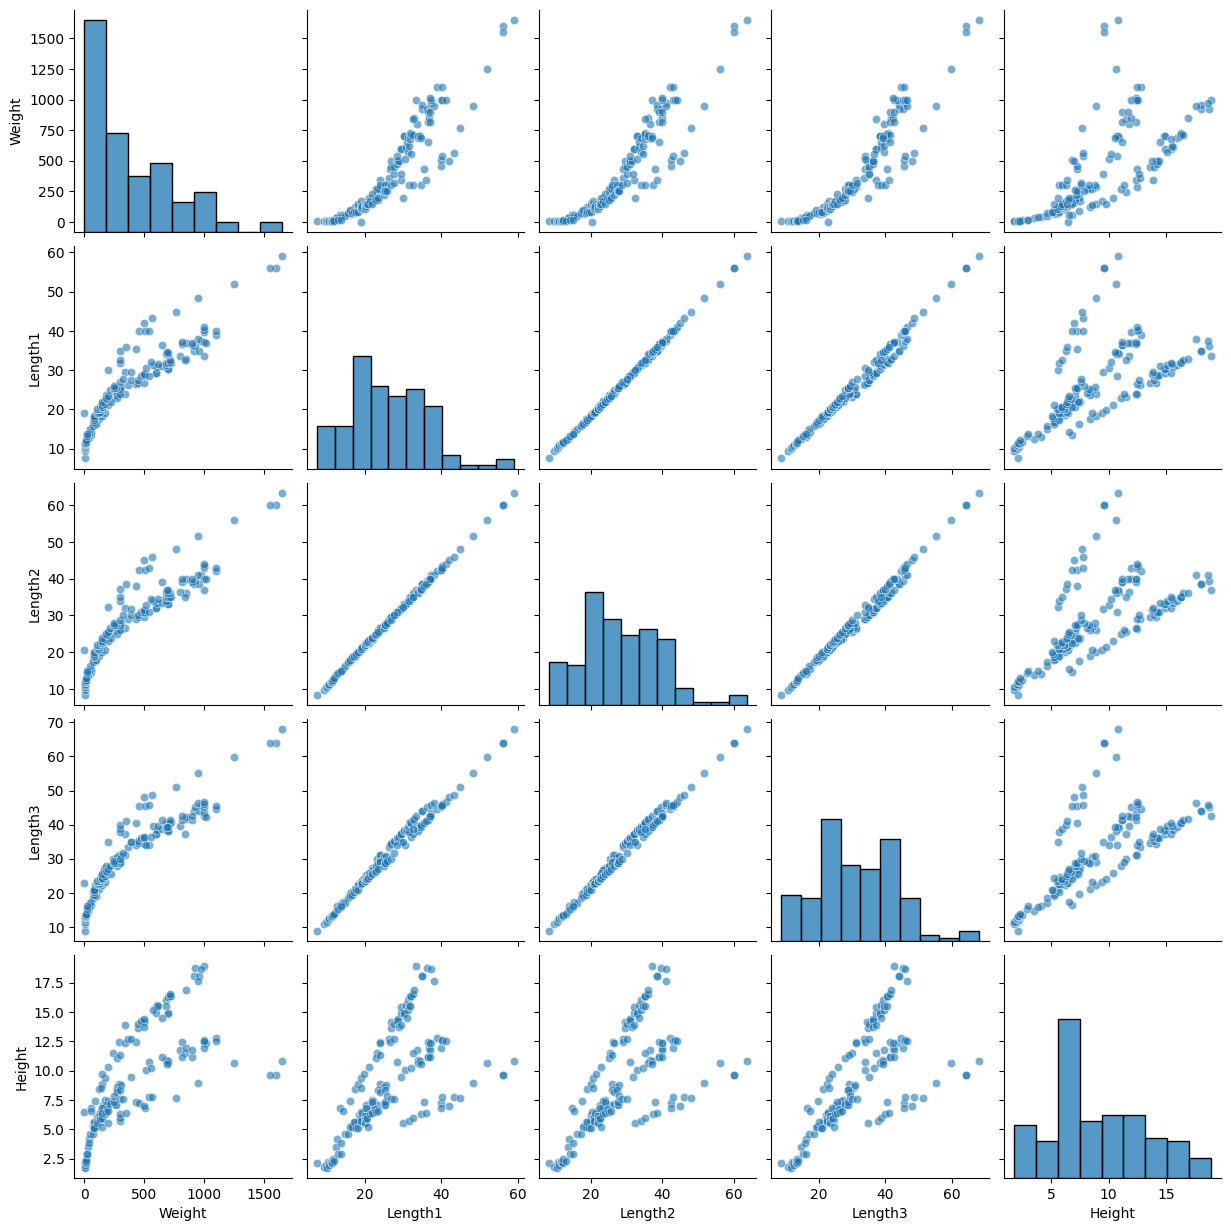

In [8]:
# Creează pairplot pentru variabilele selectate
sns.pairplot(data[['Weight', 'Length1', 'Length2', 'Length3', 'Height']], diag_kind='hist', plot_kws={'alpha':0.6})

# Afișează graficul
plt.show()

In [9]:
# Independent variables and dependent variable
X = data[['Weight', 'Length1', 'Length2', 'Length3', 'Height']]
y = data['Width']

In [10]:
# Split the dataset
# 80% for train and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# We will do an prediction based on polynomial regression
poly = PolynomialFeatures(degree = 2)

# Apply transformation for train and test data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Show the new data with polynomial terms
X_train_poly_data = pd.DataFrame(X_train_poly, columns = poly.get_feature_names_out(X.columns))
print(X_train_poly_data.head())

     1  Weight  Length1  Length2  Length3   Height   Weight^2  Weight Length1  \
0  1.0    51.5     15.0     16.2     17.2   4.5924    2652.25           772.5   
1  1.0   567.0     43.2     46.0     48.7   7.7920  321489.00         24494.4   
2  1.0   340.0     23.9     26.5     31.1  12.3778  115600.00          8126.0   
3  1.0   120.0     20.0     22.0     23.5   6.1100   14400.00          2400.0   
4  1.0   160.0     20.5     22.5     25.3   7.0334   25600.00          3280.0   

   Weight Length2  Weight Length3  ...  Length1^2  Length1 Length2  \
0           834.3           885.8  ...     225.00           243.00   
1         26082.0         27612.9  ...    1866.24          1987.20   
2          9010.0         10574.0  ...     571.21           633.35   
3          2640.0          2820.0  ...     400.00           440.00   
4          3600.0          4048.0  ...     420.25           461.25   

   Length1 Length3  Length1 Height  Length2^2  Length2 Length3  \
0           258.00        

In [12]:
# Create the model
model = LinearRegression()

In [13]:
# We apply cross-validation ( we use 5 folds )
cv_scores = cross_val_score(model, X_train_poly, y_train, cv = 5, scoring = 'neg_mean_squared_error')
print(f"Cross-validation MSE Scores for each fold: {cv_scores}")

# Calculate the mean and dev std
mean_mse = np.mean(np.abs(cv_scores))
std_mse = np.std(np.abs(cv_scores))

print(f"MSE mean: {mean_mse}")
print(f"Dev. std: {std_mse}")

Cross-validation MSE Scores for each fold: [-0.09366879 -0.15692918 -0.12224403 -0.22419638 -0.16918826]
MSE mean: 0.1532453287790939
Dev. std: 0.04429953369392035


In [14]:
# Predict the model
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.12242463583341565
R^2 Score: 0.9651100677997274


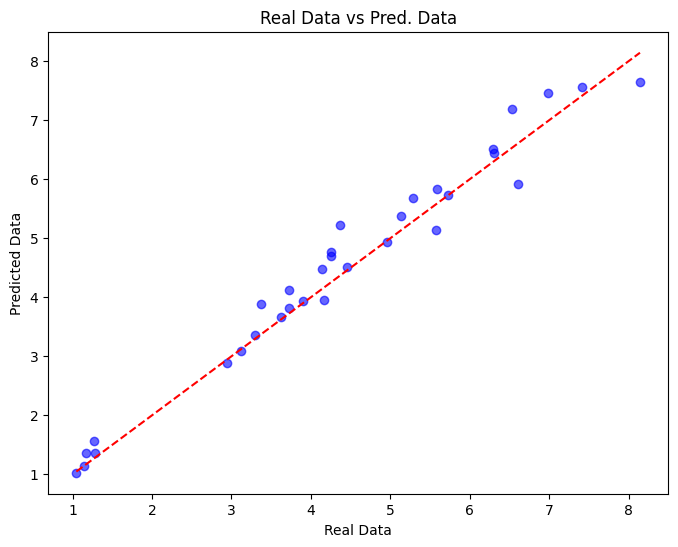

In [16]:
# Graph to compare the real data with pred. data
plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred, color = 'blue', alpha = 0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle = '--')
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.title('Real Data vs Pred. Data')
plt.show()

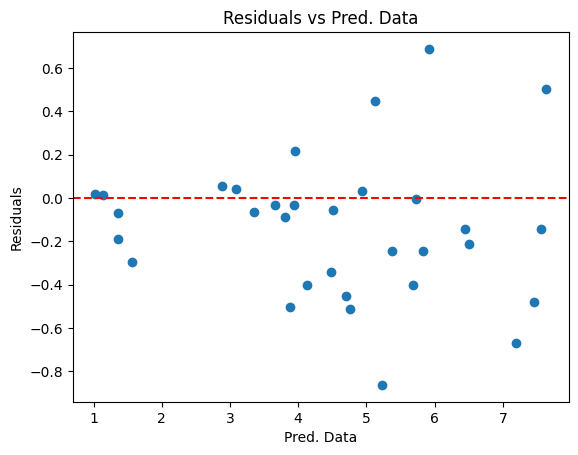

In [17]:
# Graph for residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Pred. Data')
plt.ylabel('Residuals')
plt.title('Residuals vs Pred. Data')
plt.show()